In [33]:
'''
This file contains the code for creating and evaluating
the BERT model for sentiment analysis.
This file comes after the data_preprocessing file.
'''

'\nThis file contains the code for creating and evaluating\nthe BERT model for sentiment analysis.\nThis file comes after the data_preprocessing file.\n'

In [34]:
#pip install transformers torch

In [35]:
# import the cleaned data from data_preprocessing file
import pandas as pd
df = pd.read_pickle("dataframe.pkl")


In [36]:
#remove rows for trying out model

#rows_to_keep = df.shape[0] // 120

#df = df.sample(n=rows_to_keep)

In [37]:
# Load the tokenizer and model

#DistilBERT model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
#model="finiteautomata/bertweet-base-sentiment-analysis"
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)


#BERT model
# from transformers import BertTokenizer, BertForSequenceClassification


#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
from transformers import pipeline

# Initialize the pipeline for sentiment analysis
#nlp = pipeline("sentiment-analysis", model=model)
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [39]:
# Making predictions
df['sentiment'] = df['cleaned_text'].apply(lambda x: nlp(x)[0]['label'])


In [40]:
import pickle
df.to_pickle("dataframe_DistilBert.pkl")

In [41]:
import pandas as pd
df = pd.read_pickle("dataframe_DistilBert.pkl")

In [42]:
type(df['sentiment'][0])
df

,Unnamed: 0,hashed_userid,masked_username,location,following,followers,totaltweets,usercreateddt,tweetid,retweetcount,...,language,favorite_count,is_retweet,original_tweet_id,in_reply_to_status_id,is_quote_status,quoted_status_id,extractedts,cleaned_text,sentiment
tweetcreatedts,,,,,,,,,,,,,,,,,,,,,
2022-07-01 06:53:25,0,13028308852725196659,*****roy1,NaN,9590,8725,29317,2012-01-24,1542763288815030273,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.185425,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:32,1,45494576030177085457,******eam_6,NaN,8874,10090,33053,2019-02-07,1542763315926994945,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.171429,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:35,2,23641094384211702614,******erlin,"Los Angeles, CA",7730,10006,35360,2008-08-07,1542763330670014464,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.157331,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:38,3,21587659761682762378,******oshi23,Mumbai,232,132,4970,2016-05-10,1542763339738382337,254,...,en,0,True,1542707138971242496,0,False,0,2022-07-01 12:03:31.123276,home based church are now everywhere in punjab...,LABEL_2
2022-07-01 06:53:40,4,47915146590553055505,******4Truth,NaN,6914,6310,49958,2021-04-02,1542763352279003136,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.097582,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-20 02:55:19,415367,83242079331442835051,*******tresist,NaN,257,758,272531,2017-02-16,1560822761706094592,6,...,en,0,True,1560794896663203840,0,False,0,2022-08-20 02:58:51.096736,#womensrights 🌻♥️1:5 @sandytxresister @crystal...,LABEL_0
2022-08-20 02:55:52,415368,98949018742144878760,*****ll42,NaN,603,179,59766,2014-03-14,1560822898780213249,2,...,en,0,True,1560750229720563712,0,False,0,2022-08-20 02:58:51.087505,@aaronparnas @patryanuc #ny #newyork #yankees ...,LABEL_0
2022-08-20 02:56:52,415369,42256911176251501556,*******eDuster,Chi-town,416,8852,11699,2009-03-26,1560823151671488513,1,...,en,0,True,1560280488488718336,0,False,0,2022-08-20 02:58:51.077181,the 19th amendment was ratified #onthisday in ...,LABEL_2


In [52]:
#df.drop(['preprocessed_text', 'text_with_emojis','text_with_slang', 'text_with_negations','sentiment_score' ], axis=1, inplace=True)

In [44]:
df

,Unnamed: 0,hashed_userid,masked_username,location,following,followers,totaltweets,usercreateddt,tweetid,retweetcount,...,language,favorite_count,is_retweet,original_tweet_id,in_reply_to_status_id,is_quote_status,quoted_status_id,extractedts,cleaned_text,sentiment
tweetcreatedts,,,,,,,,,,,,,,,,,,,,,
2022-07-01 06:53:25,0,13028308852725196659,*****roy1,NaN,9590,8725,29317,2012-01-24,1542763288815030273,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.185425,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:32,1,45494576030177085457,******eam_6,NaN,8874,10090,33053,2019-02-07,1542763315926994945,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.171429,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:35,2,23641094384211702614,******erlin,"Los Angeles, CA",7730,10006,35360,2008-08-07,1542763330670014464,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.157331,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
2022-07-01 06:53:38,3,21587659761682762378,******oshi23,Mumbai,232,132,4970,2016-05-10,1542763339738382337,254,...,en,0,True,1542707138971242496,0,False,0,2022-07-01 12:03:31.123276,home based church are now everywhere in punjab...,LABEL_2
2022-07-01 06:53:40,4,47915146590553055505,******4Truth,NaN,6914,6310,49958,2021-04-02,1542763352279003136,8,...,en,0,True,1542689411489337344,0,False,0,2022-07-01 12:03:31.097582,"for 49 years, liberty's torch shone to ensure ...",LABEL_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-20 02:55:19,415367,83242079331442835051,*******tresist,NaN,257,758,272531,2017-02-16,1560822761706094592,6,...,en,0,True,1560794896663203840,0,False,0,2022-08-20 02:58:51.096736,#womensrights 🌻♥️1:5 @sandytxresister @crystal...,LABEL_0
2022-08-20 02:55:52,415368,98949018742144878760,*****ll42,NaN,603,179,59766,2014-03-14,1560822898780213249,2,...,en,0,True,1560750229720563712,0,False,0,2022-08-20 02:58:51.087505,@aaronparnas @patryanuc #ny #newyork #yankees ...,LABEL_0
2022-08-20 02:56:52,415369,42256911176251501556,*******eDuster,Chi-town,416,8852,11699,2009-03-26,1560823151671488513,1,...,en,0,True,1560280488488718336,0,False,0,2022-08-20 02:58:51.077181,the 19th amendment was ratified #onthisday in ...,LABEL_2


In [45]:
value_counts = df['sentiment'].value_counts()

print(value_counts) # Label 0 is negative (pro-choice), Label 1 is neutral, Label 2 is Positive (anti-abortion)?

sentiment
LABEL_0    265541
LABEL_2    129430
Name: count, dtype: int64


In [46]:
# grouping by Mode
mode_sentiment = df.groupby('hashed_userid')['sentiment'].agg(lambda x: x.mode()[0])
value_counts_mode = mode_sentiment.value_counts()
print(value_counts_mode)

sentiment
LABEL_0    134945
LABEL_2     59479
Name: count, dtype: int64


In [47]:
# grouping by Mean
label_mapping = {
    'LABEL_0': 0,
    'LABEL_1': 1,
    'LABEL_2': 2
}

df['sentiment_int'] = df['sentiment'].replace(label_mapping)
user_mean_sentiment = df.groupby('hashed_userid')['sentiment_int'].mean()

value_counts_mean = user_mean_sentiment.value_counts()
print(value_counts_mean)

sentiment_int
0.000000    107360
2.000000     54949
1.000000     12631
0.666667      4991
1.333333      2402
             ...  
0.232558         1
0.490196         1
0.259740         1
0.150000         1
0.138614         1
Name: count, Length: 463, dtype: int64


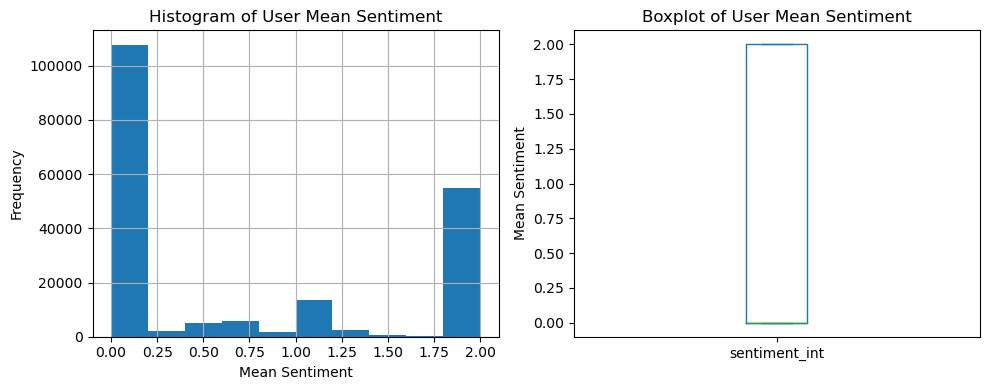

count    194424.000000
mean          0.704804
std           0.876250
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           2.000000
Name: sentiment_int, dtype: float64

In [48]:
# Summary of Mean grouping

import matplotlib.pyplot as plt

# Plotting the distribution as a histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
user_mean_sentiment.hist()
plt.title('Histogram of User Mean Sentiment')
plt.xlabel('Mean Sentiment')
plt.ylabel('Frequency')

# Plotting the distribution as a boxplot
plt.subplot(1, 2, 2)
user_mean_sentiment.plot.box()
plt.title('Boxplot of User Mean Sentiment')
plt.ylabel('Mean Sentiment')

# Showing the plots
plt.tight_layout()
plt.show()

# Printing summary statistics
user_mean_sentiment.describe()

In [49]:
filtered_df_2 = df[df['sentiment_int'] == 2]
filtered_df_2.to_csv("tweet_data_score2.csv")

In [50]:
filtered_df_1 = df[df['sentiment_int'] == 1]
filtered_df_1.to_csv("tweet_data_score1.csv")

In [51]:
filtered_df_0 = df[df['sentiment_int'] == 0]
filtered_df_0.to_csv("tweet_data_score0.csv")